In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data 
df=pd.read_csv('Advertising.csv')
df.head()#checking the first five row  from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [7]:
#feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#finding the count of missing  value from differnet columns
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

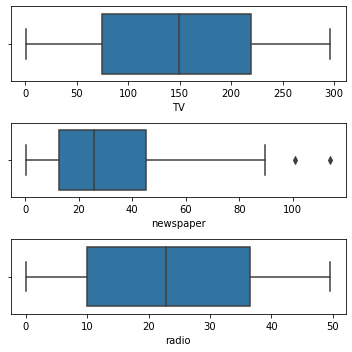

In [26]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data

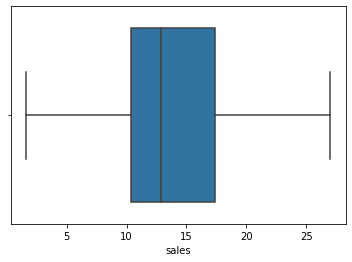

In [27]:
sns.boxplot(df['sales'])
plt.show()

Now,let's showcase the relationship between the feature  and target column

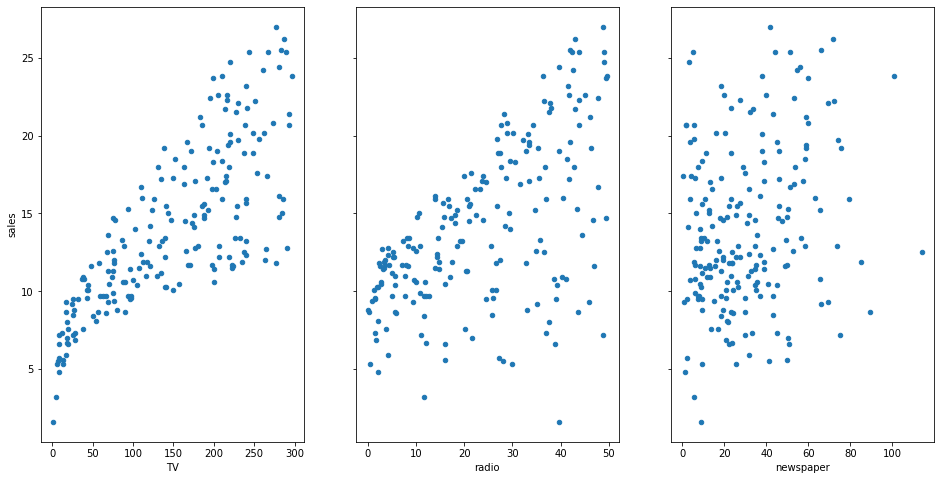

In [20]:
#visulize the relationship  between  the features and the respionse using scatterplots
fig,axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdf.jpg')

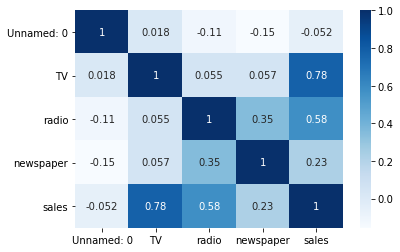

In [55]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="Blues", annot = True)
plt.show()

Simple Linear Regression
y=c+mx1+mx2+mx3(multiple linear regression)

In this case:
y=mx+c(single linear regression)
The  m  values are called the model coefficients or model parameters.

In [31]:
#We first assign the feature variable, TV, in this case, 
#to the variable X and the response variable, Sales, to the variable y.
X = df['TV']
y = df['sales']

In [32]:
#Train Split test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [34]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

Building a linear model

In [40]:
#Add  a constant to get an  intercept
X_train_sm = sm.add_constant(X_train)
# Fit the regression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

In [41]:
#print parameters
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [42]:
#performing summury
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           2.84e-30
Time:                        07:49:57   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

Lokking  at some key statistics from summary

1.The values we  are  significance (p-values)
2.R-squared
3.F statistics  and  its  significance

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.948+0.054×TV

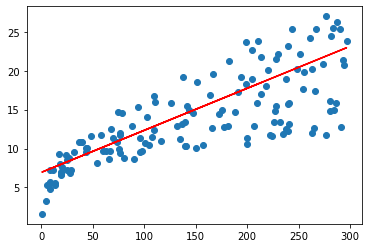

In [43]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

                  Model Evaluation
Residual analysis:-
To validate assumptions of the model, and hence the reliability for inference                  
Distribution of the error terms:-
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [44]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

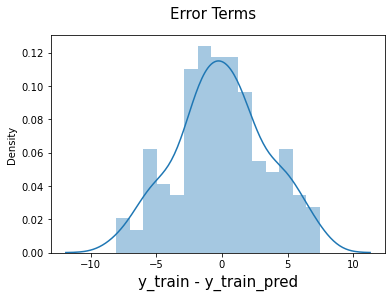

In [45]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

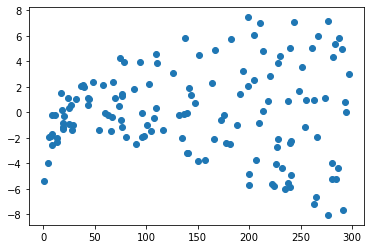

In [46]:
plt.scatter(X_train,res)
plt.show()

Prediction on the Test set

In [47]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [48]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [51]:
#Returns the mean squared error; we will take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [52]:
#test R-squared
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

Visualizing the fit on the test set

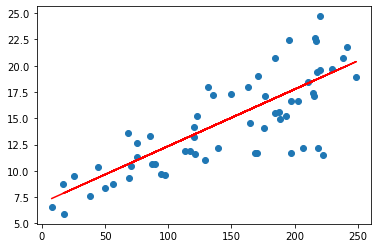

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [ ]:
 #loading the test data
testData = pd.read_csv('Advertising.csv')


In [54]:
from sklearn import set_config
set_config(display="diagram")
model_pipeline

NameError: name 'model_pipeline' is not defined